In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

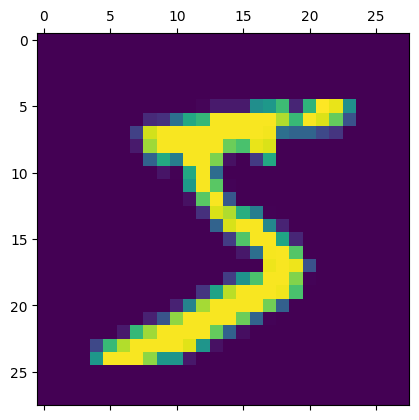

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

#### Using Flatten layer so that we don't have to call .reshape on input dataset

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1) ## Log directory to save the logs

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6727 - accuracy: 0.8278
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3438 - accuracy: 0.9039
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2943 - accuracy: 0.9176
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2637 - accuracy: 0.9263
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2408 - accuracy: 0.9329


In [13]:
### Try with adadm optimizer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1) ## Log directory to save the logs

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2758 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1229 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0851 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0638 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0493 - accuracy: 0.9845


In [15]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit